# Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras.models import   Model
from tensorflow.keras.layers import Layer, Dense

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Import and Preprocessing Data

In [2]:
def format_output(data):
    y = data.pop('y')
    y = pd.get_dummies(y)
    y = np.array(y)
    return y


def norm(x):
    x = (x - train_stats['mean']) / train_stats['std']
    return x.astype('float32')


In [3]:
df = pd.read_csv('dataset/train_dry.csv',index_col='ID')

In [4]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,,,,,,,,,,,,,,,,,
0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


In [5]:
df.y.unique()

array(['HOROZ', 'SEKER', 'DERMASON', 'SIRA', 'BARBUNYA', 'CALI', 'BOMBAY'],
      dtype=object)

In [6]:
# Split the data into train and test with 80 train / 20 test
train_set, test_set = train_test_split(df, test_size=0.2)
train_stats = train_set.describe()

# Neutral Neuron Network

In [7]:
# Get Y as the output and format it as np arrays
train_stats = train_stats.transpose()
train_Y = format_output(train_set)
test_Y = format_output(test_set)

# Normalize the training and test data
norm_train_X = norm(train_set)
norm_test_X = norm(test_set)

In [8]:
norm_test_X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
ID,,,,,,,,,,,,,,,,
10142,0.475449,0.760611,0.796233,0.472783,0.639792,0.734441,0.495658,0.664178,0.607791,-2.146786,-1.004308,-0.771791,-0.700624,-0.966904,-0.785028,-2.338557
6702,-0.661209,-0.675665,-0.581398,-0.980535,0.523597,0.660035,-0.659741,-0.786139,-1.576425,-0.146928,-0.677457,-0.595891,1.356837,-0.032144,-0.618808,0.464889
2043,0.073574,0.335064,0.745689,-0.392783,2.062508,1.386637,0.068396,0.206135,1.396137,0.472145,-1.105213,-1.799233,0.342106,-1.257063,-1.708746,-0.495358
8602,-0.353475,-0.505101,-0.838336,0.368948,-1.854511,-3.142858,-0.358965,-0.339508,0.627610,0.832954,1.475604,2.300169,-0.663041,1.843319,2.457394,0.958041
7034,0.195716,0.565419,0.955654,-0.327877,2.325607,1.470599,0.189446,0.350214,1.005431,0.528928,-1.647826,-1.958020,0.233143,-1.374808,-1.844314,-0.028821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,-0.532083,-0.656220,-0.600252,-0.545809,-0.294548,-0.016972,-0.533681,-0.592018,1.126450,0.348206,0.768131,0.190850,0.570683,0.360097,0.153541,-0.019503
4844,-0.757379,-0.908607,-0.719529,-1.123445,0.500418,0.644669,-0.759869,-0.938186,-0.716377,0.743390,0.148485,-0.594480,1.688461,0.101718,-0.617465,-0.264973
5883,-0.604344,-0.824837,-1.089716,-0.100759,-1.806363,-2.955909,-0.607614,-0.699330,1.015313,0.717860,1.483459,2.221779,-0.107487,2.248857,2.365699,0.993368


In [9]:
test_Y.shape

(2167, 7)

In [10]:
batch_size = 128
# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((norm_train_X, train_Y))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((norm_test_X, test_Y))
val_dataset = val_dataset.batch(batch_size)


In [11]:
for i ,(x, y) in enumerate(train_dataset):
    print(x.shape, y.shape)
    
    if i ==2:
        break

for i ,(x, y) in enumerate(val_dataset):
    print(x.shape, y.shape)
    
    if i ==2:
        break

(128, 16) (128, 7)
(128, 16) (128, 7)
(128, 16) (128, 7)
(128, 16) (128, 7)
(128, 16) (128, 7)
(128, 16) (128, 7)


In [12]:
# Define Custom Dense Layer

class DNNLayer(Layer):
    def __init__(self, layers, neurons, **kwargs):
        super(DNNLayer, self).__init__(**kwargs)
        self.hidden = [ Dense(neurons, activation='relu')
                        for _ in range(layers)]
    
    def call(self, inputs): 
        
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        return x

In [13]:
# Define Custom Model

class MyModel(Model):
    def __init__(self, *args):
        super(MyModel, self).__init__()
        self.drop = tf.keras.layers.Dropout(0.2)
        self.hidden = Dense(128, activation='relu')
        self.block1 = DNNLayer(2, 128)
        self.block2 = DNNLayer(2,64)
        self.out = Dense(7, activation='softmax')
        
        
    def call(self, inputs):
        
        x = self.hidden(inputs)
        x = self.block1(x)
        x = self.drop(x)
        x = self.block2(x)
            
        return self.out(x)
    
    def build_graph(self, inputs):
        x = tf.keras.Input(shape=(inputs))
        return Model(inputs=[x], outputs=self.call(x))

In [14]:
dim = (batch_size, 16)
model = MyModel((dim))
model.build((None, *dim))
model.build_graph(dim).summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 16)]         0         
                                                                 
 dense (Dense)               (None, 128, 128)          2176      
                                                                 
 dnn_layer (DNNLayer)        (None, 128, 128)          33024     
                                                                 
 dropout (Dropout)           (None, 128, 128)          0         
                                                                 
 dnn_layer_1 (DNNLayer)      (None, 128, 64)           12416     
                                                                 
 dense_5 (Dense)             (None, 128, 7)            455       
                                                                 
Total params: 48,071
Trainable params: 48,071
Non-trainable p

In [15]:
tf.keras.utils.plot_model(
    model.build_graph(dim),                      # here is the trick (for now)
    to_file='model.png', dpi=96,              # saving  
    show_shapes=True, show_layer_names=True,  # show shapes and layer name
    expand_nested=False                       # will show nested block
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [16]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.CategoricalCrossentropy()

In [17]:
train_acc_metric = tf.keras.metrics.CategoricalAccuracy()
val_acc_metric = tf.keras.metrics.CategoricalAccuracy()

# tensorboard writer 
train_writer = tf.summary.create_file_writer('logs/train/')
test_writer  = tf.summary.create_file_writer('logs/test/')

In [18]:
def apply_gradient(optimizer, model,norm_train_X , train_Y):
    with tf.GradientTape() as tape:
        logits = model(norm_train_X, training=True)
        loss_value = loss_object(y_true=train_Y, y_pred=logits)
  
    gradients = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  
    return logits, loss_value

In [19]:
def train_data_for_one_epoch():
    losses = []
    # write training loss and accuracy to the tensorboard
    
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

            logits, loss_value = apply_gradient(optimizer, model, x_batch_train, y_batch_train)
      
            losses.append(loss_value)
      
            train_acc_metric(y_batch_train, logits)
        
            with train_writer.as_default():
                tf.summary.scalar('loss', loss_value, step=step)
                tf.summary.scalar('accuracy', train_acc_metric.result(), step=step) 
    return losses

In [20]:
def perform_validation():
    losses = []
    for step, (x_val, y_val) in enumerate (val_dataset):
        val_logits = model(x_val)
        val_loss = loss_object(y_true=y_val, y_pred=val_logits)
        losses.append(val_loss)
        val_acc_metric.update_state(y_val, val_logits)
        
        with test_writer.as_default():
            tf.summary.scalar('val loss', val_loss, step=step)
            tf.summary.scalar('val accuracy', val_acc_metric.result(), step=step) 

        return losses

In [21]:
import time

In [22]:
# Iterate over epochs.
epochs = 15
epochs_val_losses, epochs_train_losses = [], []
train_ac, val_ac = [], []
for epoch in range(epochs):
    
    t = time.time()
    
    losses_train = train_data_for_one_epoch()
    train_acc = train_acc_metric.result()

    losses_val = perform_validation()
    val_acc = val_acc_metric.result()
    
    train_ac.append(train_acc)
    val_ac.append(val_acc)

    losses_train_mean = np.mean(losses_train)
    losses_val_mean = np.mean(losses_val)
    epochs_val_losses.append(losses_val_mean)
    epochs_train_losses.append(losses_train_mean)

    template = 'ETA: {} - epoch: {} loss: {}  acc: {} val loss: {} val acc: {}\n'
    print(template.format(
        round((time.time() - t)/60, 2), epoch + 1,
        losses_train_mean, float(train_acc_metric.result()),
        losses_val_mean, float(val_acc_metric.result())
    ))
  
    train_acc_metric.reset_states()
    val_acc_metric.reset_states()


ETA: 0.03 - epoch: 1 loss: 0.7513441443443298  acc: 0.7438560128211975 val loss: 0.2525019645690918 val acc: 0.890625

ETA: 0.03 - epoch: 2 loss: 0.27060627937316895  acc: 0.9049267172813416 val loss: 0.1984478384256363 val acc: 0.9296875

ETA: 0.03 - epoch: 3 loss: 0.22856418788433075  acc: 0.9168108701705933 val loss: 0.16210338473320007 val acc: 0.953125

ETA: 0.03 - epoch: 4 loss: 0.2199552208185196  acc: 0.9205030798912048 val loss: 0.13227754831314087 val acc: 0.9609375

ETA: 0.03 - epoch: 5 loss: 0.21663780510425568  acc: 0.9223491549491882 val loss: 0.14895279705524445 val acc: 0.9453125

ETA: 0.03 - epoch: 6 loss: 0.21206320822238922  acc: 0.9233875870704651 val loss: 0.14878952503204346 val acc: 0.9453125

ETA: 0.03 - epoch: 7 loss: 0.20803113281726837  acc: 0.9236183166503906 val loss: 0.12834429740905762 val acc: 0.9609375

ETA: 0.03 - epoch: 8 loss: 0.20436136424541473  acc: 0.926041305065155 val loss: 0.12055062502622604 val acc: 0.96875

ETA: 0.03 - epoch: 9 loss: 0.2002

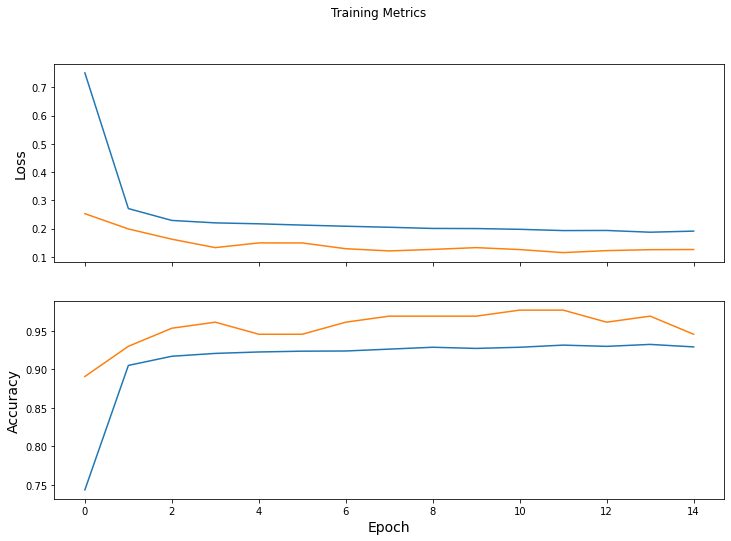

In [23]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(epochs_train_losses)
axes[0].plot(epochs_val_losses)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_ac)
axes[1].plot(val_ac)
plt.show()

In [24]:
Y_pred = model.predict(norm_test_X)

In [25]:
Y_pred = np.round(Y_pred)

In [26]:
Y_pred

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [27]:
Y_pred[0]

array([0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
test_Y[0]

array([0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [29]:
test_Y

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [30]:
test_set["y_hat"]=np.argmax(Y_pred, axis=1)
test_set["y_true"]=np.argmax(test_Y, axis=1)


In [31]:
test_set

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y_hat,y_true
ID,,,,,,,,,,,,,,,,,,
10142,67513,1021.125,389.420660,224.046115,1.738127,0.817920,69075,293.189736,0.779974,0.977387,0.813653,0.752887,0.005768,0.001143,0.566839,0.985238,2,2
6702,33332,709.061,269.765050,157.783291,1.709719,0.811112,33788,206.008787,0.672396,0.986504,0.833113,0.763660,0.008093,0.001698,0.583177,0.997068,3,3
2043,55428,928.665,385.030653,184.581342,2.085967,0.877600,56026,265.656021,0.818802,0.989326,0.807646,0.689961,0.006947,0.000971,0.476046,0.993016,4,4
8602,42586,746.120,247.448384,219.311829,1.128295,0.463124,42974,232.856564,0.780950,0.990971,0.961301,0.941031,0.005811,0.002811,0.885539,0.999149,5,5
7034,59101,978.715,403.267324,187.540698,2.150292,0.885283,59723,274.316843,0.799559,0.989585,0.775340,0.680236,0.006823,0.000901,0.462721,0.994985,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,37215,713.286,268.127426,177.604250,1.509690,0.749161,37638,217.677766,0.805519,0.988761,0.919180,0.811844,0.007205,0.001931,0.659091,0.995024,3,6
4844,30440,658.449,257.767510,151.267417,1.704052,0.809705,30730,196.869022,0.714755,0.990563,0.882288,0.763746,0.008468,0.001777,0.583309,0.993988,3,3
5883,35042,676.650,225.614521,197.895934,1.140066,0.480231,35380,211.227035,0.800046,0.990447,0.961769,0.936230,0.006438,0.003051,0.876526,0.999298,5,5


In [32]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import seaborn as sns

In [33]:
accuracy_score(test_set['y_hat'], test_set['y_true'])


0.9243193354868482

In [34]:
print(classification_report(test_set['y_hat'], test_set['y_true']))


              precision    recall  f1-score   support

           0       0.92      0.86      0.89       235
           1       1.00      1.00      1.00        71
           2       0.93      0.95      0.94       284
           3       0.94      0.92      0.93       592
           4       0.95      0.96      0.95       286
           5       0.95      0.93      0.94       326
           6       0.84      0.91      0.87       373

    accuracy                           0.92      2167
   macro avg       0.93      0.93      0.93      2167
weighted avg       0.93      0.92      0.92      2167



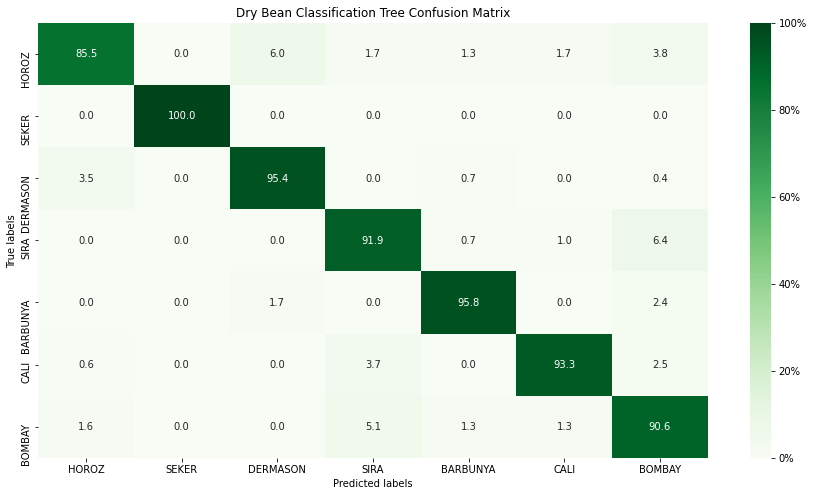

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))
cm = confusion_matrix(test_set['y_hat'], test_set['y_true'], normalize='true')*100
sns.heatmap(cm,annot=True, fmt=".1f",cbar_kws={'format': '%.0f%%'},cmap='Greens')
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Dry Bean Classification Tree Confusion Matrix'); 
ax.xaxis.set_ticklabels(df.y.unique()); 
ax.yaxis.set_ticklabels(df.y.unique());
plt.show()

# KNN

In [36]:
train_y=np.argmax(train_Y, axis=1)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(norm_train_X,train_y)

#Predict Output
test_set["y_hat"]=model.predict(norm_test_X)
#print(predicted)

In [38]:
test_set

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y_hat,y_true
ID,,,,,,,,,,,,,,,,,,
10142,67513,1021.125,389.420660,224.046115,1.738127,0.817920,69075,293.189736,0.779974,0.977387,0.813653,0.752887,0.005768,0.001143,0.566839,0.985238,2,2
6702,33332,709.061,269.765050,157.783291,1.709719,0.811112,33788,206.008787,0.672396,0.986504,0.833113,0.763660,0.008093,0.001698,0.583177,0.997068,3,3
2043,55428,928.665,385.030653,184.581342,2.085967,0.877600,56026,265.656021,0.818802,0.989326,0.807646,0.689961,0.006947,0.000971,0.476046,0.993016,4,4
8602,42586,746.120,247.448384,219.311829,1.128295,0.463124,42974,232.856564,0.780950,0.990971,0.961301,0.941031,0.005811,0.002811,0.885539,0.999149,5,5
7034,59101,978.715,403.267324,187.540698,2.150292,0.885283,59723,274.316843,0.799559,0.989585,0.775340,0.680236,0.006823,0.000901,0.462721,0.994985,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,37215,713.286,268.127426,177.604250,1.509690,0.749161,37638,217.677766,0.805519,0.988761,0.919180,0.811844,0.007205,0.001931,0.659091,0.995024,3,6
4844,30440,658.449,257.767510,151.267417,1.704052,0.809705,30730,196.869022,0.714755,0.990563,0.882288,0.763746,0.008468,0.001777,0.583309,0.993988,3,3
5883,35042,676.650,225.614521,197.895934,1.140066,0.480231,35380,211.227035,0.800046,0.990447,0.961769,0.936230,0.006438,0.003051,0.876526,0.999298,5,5


In [39]:
(test_set["y_hat"]==test_set["y_true"]).mean()

0.9192431933548685

In [40]:
print(classification_report(test_set['y_hat'], test_set['y_true']))


              precision    recall  f1-score   support

           0       0.88      0.92      0.90       210
           1       1.00      1.00      1.00        71
           2       0.94      0.93      0.93       294
           3       0.91      0.92      0.92       575
           4       0.97      0.94      0.95       296
           5       0.95      0.96      0.95       317
           6       0.86      0.85      0.86       404

    accuracy                           0.92      2167
   macro avg       0.93      0.93      0.93      2167
weighted avg       0.92      0.92      0.92      2167



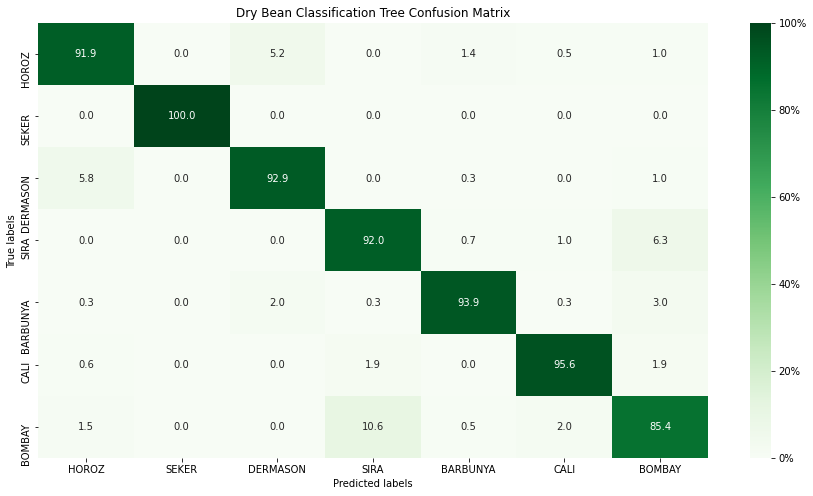

In [41]:
fig, ax = plt.subplots(figsize=(15, 8))
cm = confusion_matrix(test_set['y_hat'], test_set['y_true'], normalize='true')*100
sns.heatmap(cm,annot=True, fmt=".1f",cbar_kws={'format': '%.0f%%'},cmap='Greens')
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Dry Bean Classification Tree Confusion Matrix'); 
ax.xaxis.set_ticklabels(df.y.unique()); 
ax.yaxis.set_ticklabels(df.y.unique());
plt.show()